<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/week-Apr.-17/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://raw.githubusercontent.com/fenago/datasets/main/data.csv

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/data.csv")
df.sample(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2306,2014-06-11 00:00:00,852600.0,4.0,2.5,3320,11901,2.0,0,0,5,2650,670,1977,0,5334-5394 134th Ave SE,Bellevue,WA 98006,USA
3145,2014-06-23 00:00:00,560000.0,4.0,2.5,2300,7989,2.0,0,0,3,2300,0,1990,2009,22912 NE 19th Dr,Sammamish,WA 98074,USA
2070,2014-06-06 00:00:00,585000.0,4.0,2.5,2430,4747,2.0,0,0,3,2430,0,2008,0,360 SE Bush St,Issaquah,WA 98027,USA


In [ ]:
to_drop = ['date', 'street','statezip','country']
df = df.drop(to_drop, axis = 1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [ ]:
# How old is the house?
df['house_age'] = [2023 - yr_built for yr_built in df['yr_built']]

# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0 
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2023 - yr_renovated) <= 10 
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2023 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]

# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,68,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,102,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,57,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,60,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,47,1,0,0


In [ ]:
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [ ]:
remap_location(data=df,location='Fall City')

'Rare'

In [ ]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
3406,225000.0,3.0,2.00,1700,11475,1.0,0,0,5,970,730,Burien,78,0,0,0
494,647000.0,4.0,2.50,3040,6887,2.0,0,0,3,3040,0,Sammamish,24,0,0,0
1288,388000.0,4.0,2.50,2440,7155,2.0,0,0,3,2440,0,Renton,30,0,0,0
2181,1025000.0,5.0,4.00,3760,28040,2.0,0,0,3,3760,0,Kirkland,40,1,0,1
1388,994000.0,3.0,2.25,2510,6339,1.5,0,2,5,1810,700,Seattle,91,1,0,1
3581,480000.0,2.0,1.00,1500,3420,1.0,0,0,3,1500,0,Seattle,121,0,0,0
3998,780000.0,4.0,2.00,2600,4800,1.0,0,2,3,1400,1200,Seattle,70,0,0,0
2929,450000.0,3.0,2.00,1430,3480,1.0,0,0,3,980,450,Seattle,76,1,0,1
4294,499950.0,4.0,1.75,1520,7700,1.0,0,0,4,1520,0,Kirkland,56,0,0,0
3573,523460.0,5.0,1.75,1890,5000,1.5,0,0,3,1090,800,Seattle,117,1,1,0


In [ ]:
df.sample(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
3383,346500.00,3.0,1.00,1150,11802,1.0,0,0,4,1150,0,Seattle,91,1,0,0
3294,608000.00,4.0,2.50,2690,4736,2.0,0,0,3,2690,0,Redmond,22,0,0,0
47,407500.00,3.0,2.50,1930,10460,2.0,0,0,3,1930,0,Renton,27,0,0,0
2015,270000.00,4.0,2.25,1900,8600,1.0,0,0,4,1900,0,Federal Way,48,0,0,0
3848,732000.00,3.0,3.75,2670,6517,2.5,0,4,4,2020,650,Seattle,46,0,0,0
2097,525000.00,3.0,3.00,2470,36445,2.0,0,0,4,2470,0,Issaquah,43,0,0,0
2326,657500.00,4.0,2.75,4140,24190,2.0,0,0,3,4140,0,Auburn,21,0,0,0
1191,398000.00,2.0,1.00,590,10945,1.5,0,0,3,590,0,Rare,40,1,0,1
2046,835000.00,2.0,2.00,2280,6815,1.0,0,0,3,2280,0,Redmond,21,0,0,0
3521,224000.00,3.0,1.75,1500,11968,1.0,0,0,3,1500,0,Rare,9,0,0,0


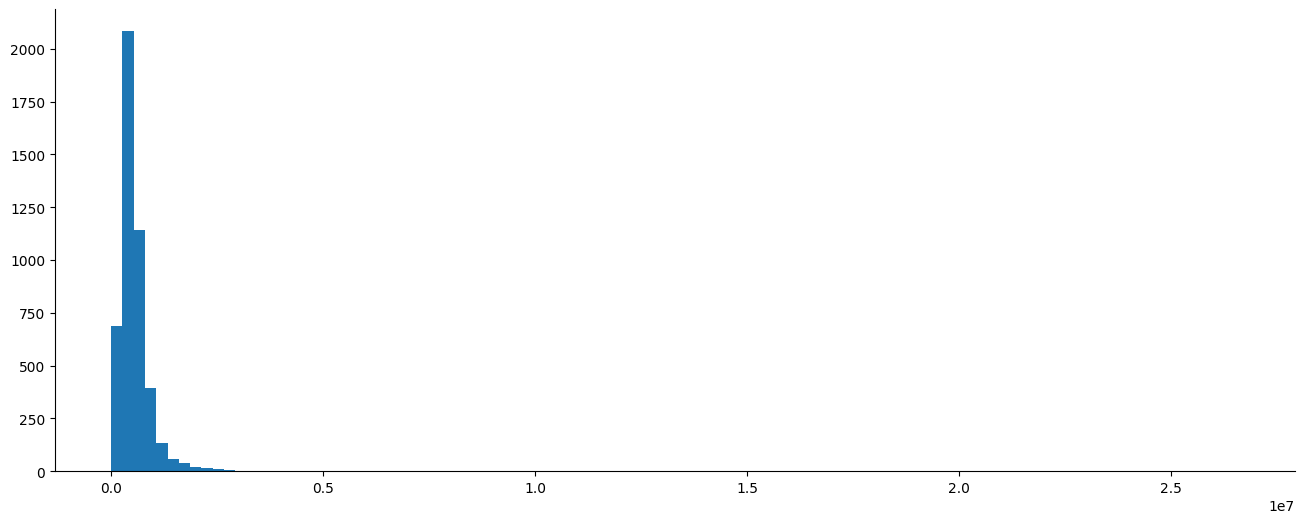

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

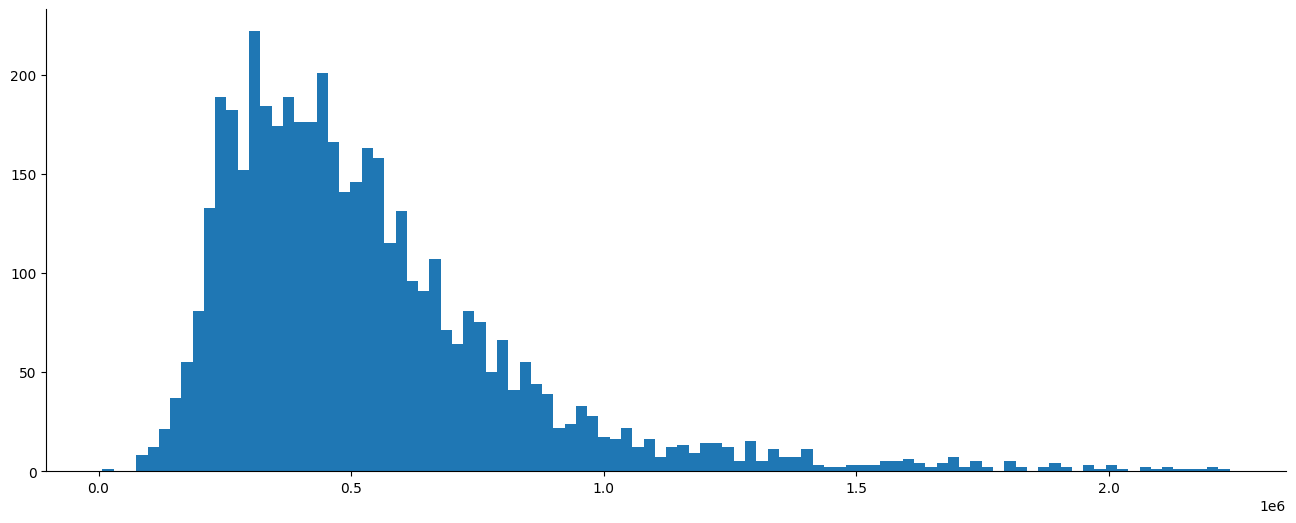

In [ ]:
from scipy import stats


# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out outliers
df = df[df['price_z'] <= 3]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['sqft_living', 'sqft_lot','sqft_above', 
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['bedrooms', 'bathrooms', 'floors', 
         'view', 'condition'])
)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,68,1,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,57,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,60,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,47,1,0,0
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,85,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Fit
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [ ]:
X_train.toarray()

array([[0.21438849, 0.33897196, 0.21438849, ..., 1.        , 0.        ,
        0.        ],
       [0.26043165, 0.00742988, 0.10503597, ..., 0.        , 0.        ,
        1.        ],
       [0.55251799, 0.02588045, 0.55251799, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.27194245, 0.01478794, 0.27194245, ..., 1.        , 0.        ,
        0.        ],
       [0.56115108, 0.00799192, 0.4028777 , ..., 0.        , 0.        ,
        1.        ],
       [0.21007194, 0.01236491, 0.21007194, ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
113/113 [==============================] - 2s 3ms/step - loss: 607087.6875 - rmse: 607105.6250
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 421697.5625 - rmse: 421519.7812
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 266809.4062 - rmse: 266784.9375
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 247624.5156 - rmse: 247566.5469
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 237955.1406 - rmse: 238021.8594
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 229871.2031 - rmse: 229822.4375
Epoch 7/100
113/113 [==============================] - 0s 3ms/step - loss: 226286.7656 - rmse: 226255.1875
Epoch 8/100
113/113 [==============================] - 0s 3ms/step - loss: 221924.6562 - rmse: 221954.4375
Epoch 9/100
113/113 [==============================] - 0s 3ms/step - loss: 218088.7812 - rmse: 218031.9844
Epoch 10/100
113/113 [===============

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

29/29 [==============================] - 1s 7ms/step


array([[ 496997.44],
       [ 599263.7 ],
       [1232370.8 ],
       [ 279549.4 ],
       [ 320080.7 ]], dtype=float32)

In [ ]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 496997.44,  599263.7 , 1232370.8 ,  279549.4 ,  320080.7 ],
      dtype=float32)

In [ ]:
rmse(y_test, predictions).numpy()

191109.33243877903

In [ ]:
# Classification
# https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv")
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2090,white,7.2,0.25,0.19,8.0,0.044,51.0,172.0,0.99640,3.16,0.44,9.2,5
1753,white,7.4,0.23,0.25,1.4,0.049,43.0,141.0,0.99340,3.42,0.54,10.2,7
1548,white,7.1,0.36,0.24,1.8,0.025,32.0,102.0,0.99030,3.34,0.59,12.8,6
4856,white,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.0,6
5691,red,7.7,0.60,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [ ]:
df = df.dropna()

In [ ]:
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

In [ ]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [ ]:
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 2s 4ms/step - loss: 0.5281 - accuracy: 0.7364 - precision: 0.7669 - recall: 0.8396
Epoch 2/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4953 - accuracy: 0.7638 - precision: 0.8006 - recall: 0.8360
Epoch 3/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4782 - accuracy: 0.7733 - precision: 0.8068 - recall: 0.8451
Epoch 4/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.7834 - precision: 0.8212 - recall: 0.8418
Epoch 5/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4510 - accuracy: 0.7870 - precision: 0.8205 - recall: 0.8503
Epoch 6/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4408 - accuracy: 0.7897 - precision: 0.8264 - recall: 0.8463
Epoch 7/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4330 - accuracy: 0.7946 - precision: 0.8283 - recall: 0.8530
Epoch 8/100
162/162 [=============

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

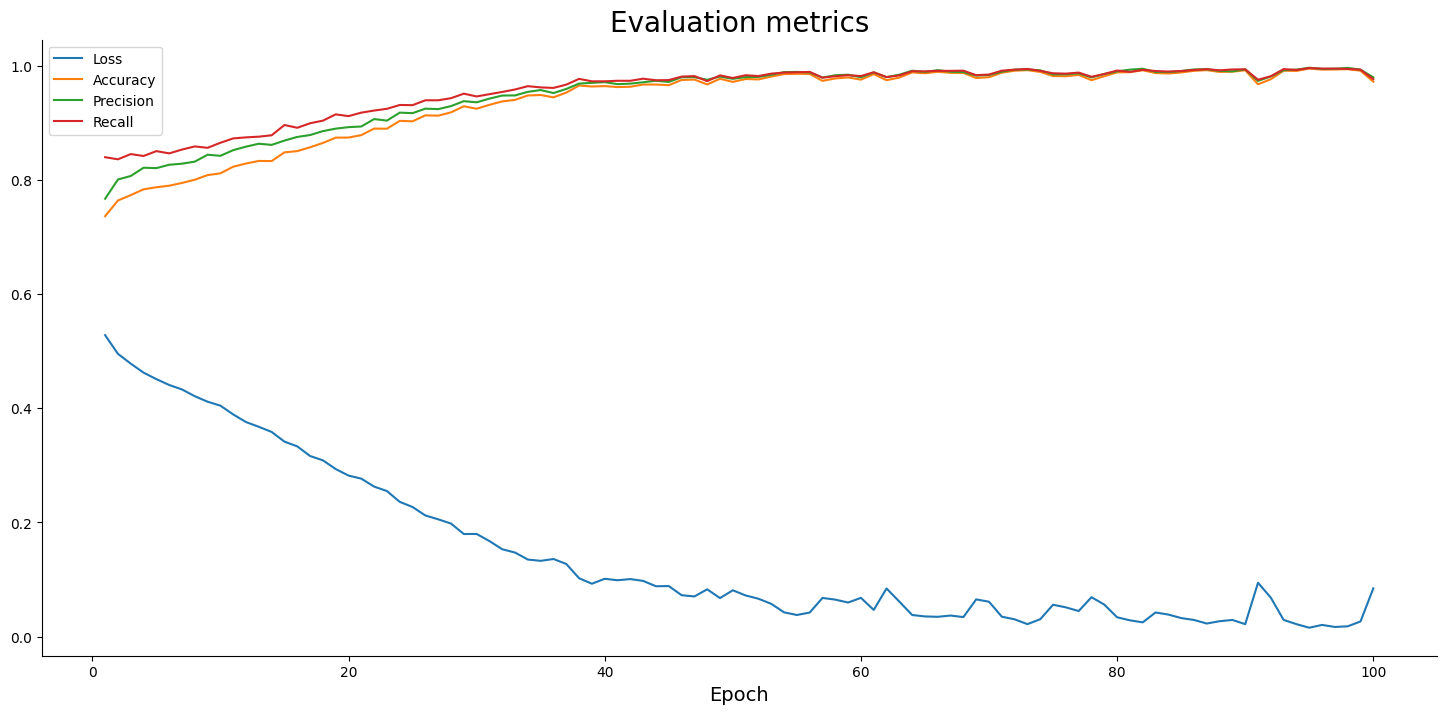

In [ ]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)

41/41 [==============================] - 0s 3ms/step


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [ ]:
prediction_classes

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[329 153]
 [109 702]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.80
Precision: 0.82
Recall: 0.87
